In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import re
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [2]:
PATH = 'F:/Study/Dissertation/markovchain/datasets/'

In [3]:
all_files = os.listdir(PATH)
all_files

['GreatExpectations_CharlesDickens.txt',
 'GreatGatsby_FScottFitzgerald.txt',
 'HuckleberryFinn_MarkTwain.txt',
 'MobyDick_HermanMelville.txt',
 'OliverTwist_CharlesDickens.txt',
 'PridePrejudice_JaneAusten.txt',
 'SherlockHolmes_ArthurDoyle.txt',
 'SignOfTheFour_ArthurDoyle.txt']

In [4]:
def data_split_custom(text):
    
    texts = len(text)
        
    split = int(0.8 * texts)
        
    return text[:split], text[split+1:]

In [5]:
def data_cleaning(novel):
    
    novel = re.sub('\n', ' ', novel)
    novel = re.sub('_', ' ', novel)
    novel = re.sub('\u200a', ' ', novel)
    novel = re.sub('½', '1/2', novel)
    novel = re.sub(' +', ' ', novel)
    novel = re.sub('\t', ' ', novel)
    novel = re.sub('…', ' ', novel)
    
    return novel
    

In [6]:
all_characters = set()
dual_characters = set()

for file in all_files:
    
    book = open(PATH + file, 'r', encoding = 'utf-8-sig')
    
    novel = book.read()
    
    novel = data_cleaning(novel)
    
    all_characters |= set(novel)
    
    dual_characters |= set(list(''.join(x) for x in zip(novel[:-1], novel[1:])))
    

all_characters = sorted(list(all_characters))
dual_characters = sorted(list(dual_characters))
    

In [7]:
print(all_characters)

[' ', '!', '$', '&', "'", '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '£', 'à', 'â', 'æ', 'ç', 'è', 'é', 'ê', 'î', 'ô', 'ö', 'û', 'ü', 'œ', '—', '‘', '’', '“', '”']


In [8]:
len(all_characters)

98

In [9]:
print(dual_characters)

['  ', ' !', ' $', ' &', " '", ' (', ' )', ' *', ' ,', ' -', ' .', ' 1', ' 2', ' 3', ' 4', ' 5', ' 6', ' 7', ' 8', ' 9', ' ;', ' ?', ' A', ' B', ' C', ' D', ' E', ' F', ' G', ' H', ' I', ' J', ' K', ' L', ' M', ' N', ' O', ' P', ' Q', ' R', ' S', ' T', ' U', ' V', ' W', ' X', ' Y', ' Z', ' [', ' ]', ' a', ' b', ' c', ' d', ' e', ' f', ' g', ' h', ' i', ' j', ' k', ' l', ' m', ' n', ' o', ' p', ' q', ' r', ' s', ' t', ' u', ' v', ' w', ' y', ' z', ' £', ' à', ' æ', ' é', ' —', ' ‘', ' ’', ' “', ' ”', '! ', '!!', "!'", '!)', '!*', '!-', '!—', '!’', '!”', '$2', '$3', '$5', '$7', '& ', '&c', '&m', "' ", "'!", "',", "'-", "'.", "':", "';", "'?", "'B", "'C", "'D", "'F", "'G", "'H", "'I", "'L", "'M", "'N", "'O", "'R", "'S", "'T", "'W", "'a", "'b", "'c", "'d", "'e", "'f", "'i", "'k", "'l", "'m", "'n", "'o", "'p", "'r", "'s", "'t", "'u", "'v", "'w", "'y", "'”", '( ', '(1', '(3', '(A', '(B', '(H', '(I', '(J', '(L', '(M', '(O', '(P', '(S', '(T', '(W', '(Y', '(a', '(b', '(c', '(d', '(e', '(f', '(g

In [10]:
len(dual_characters)

2336

In [11]:
idx = dict((c, i) for i, c in enumerate(all_characters))

In [12]:

novels = []
novels_train = []
novels_test = []
probs = {}
probs_log = {}
charslen = {}

for file in all_files:
            
    book = open(PATH + file, 'r', encoding = 'utf-8-sig')
            
    novel = book.read()
    
    novel = data_cleaning(novel)
    
    #characters = list(set(novel))
    
    total_len = len(novel)

    #novel = ' '.join(novel.strip())
    
    novel_train, novel_test = data_split_custom(novel)
    
    probs[file] = {}
    probs_log[file] = {}
    charslen[file] = {}
    
    for char in all_characters:
        
        charcount = novel_train.count(char)
        
        probs[file][char] = charcount/total_len
        
        charslen[file][char] = charcount
        
        #Maintaining 0 for single characters as a distinguishing feature over all values.
        if charcount == 0:
            probs_log[file][char] = 0

        else:
            probs_log[file][char] = math.log((charcount)/(total_len))
    
    #print(novel[:100])
    
    novels.append(novel)
    novels_train.append(novel_train)
    novels_test.append(novel_test)
    
    

In [13]:
charslen_df = pd.DataFrame(charslen)

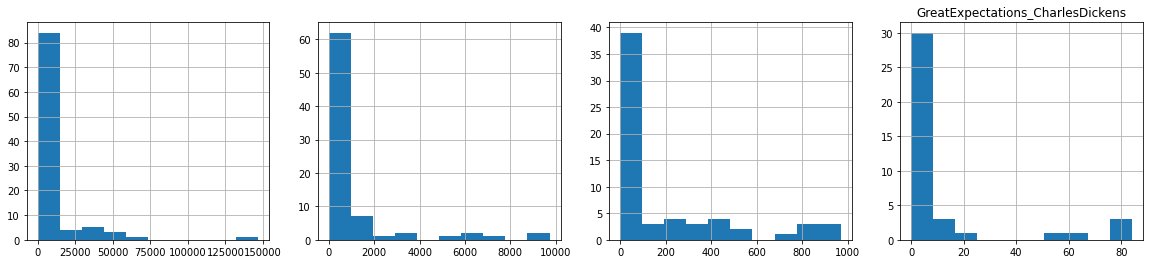

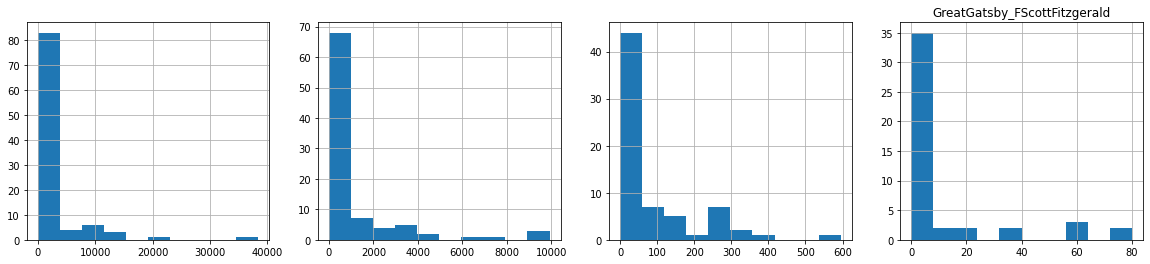

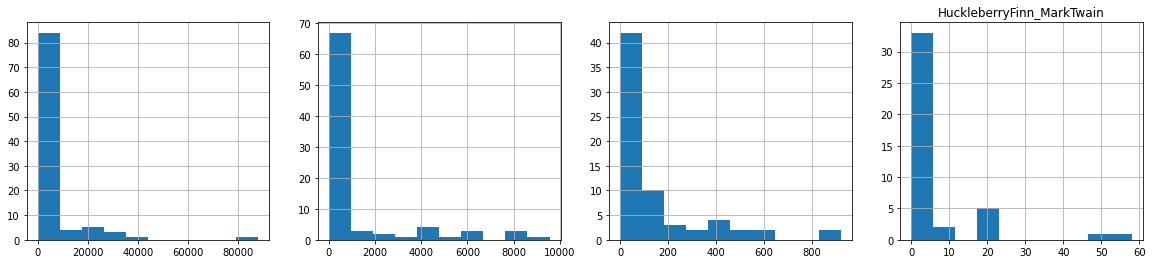

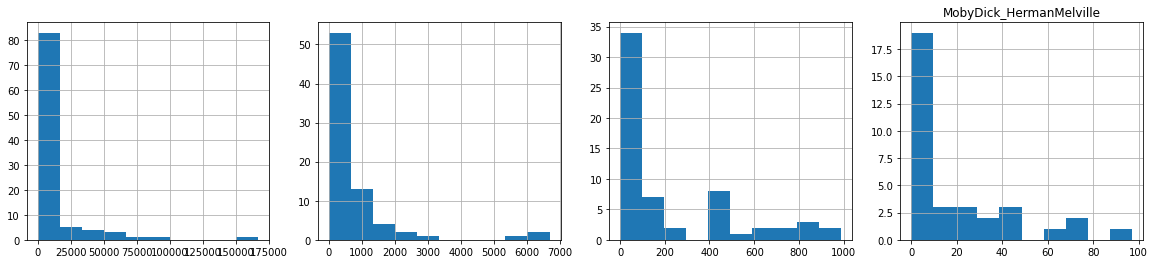

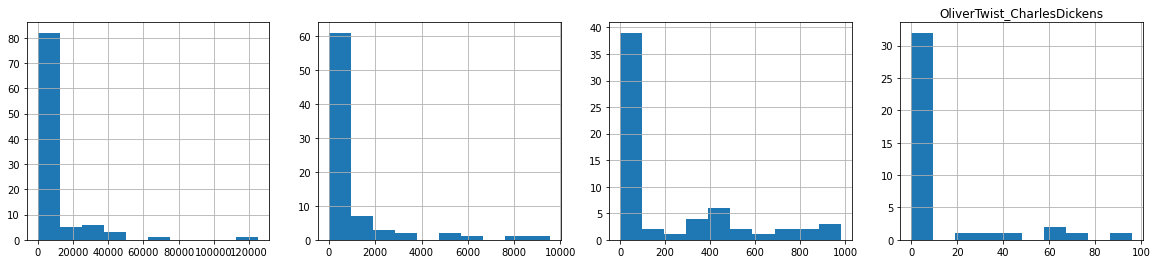

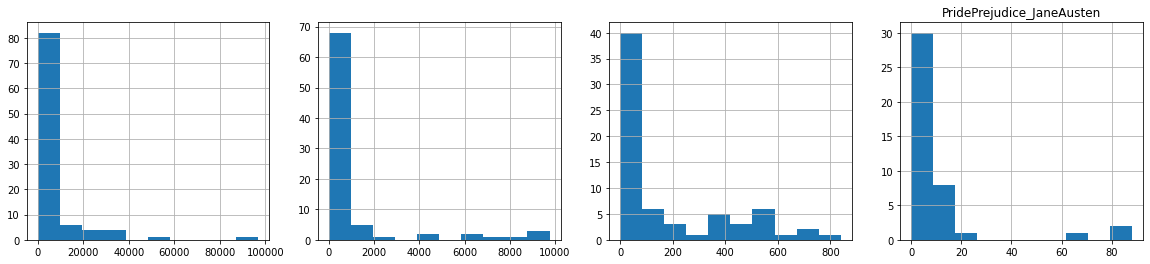

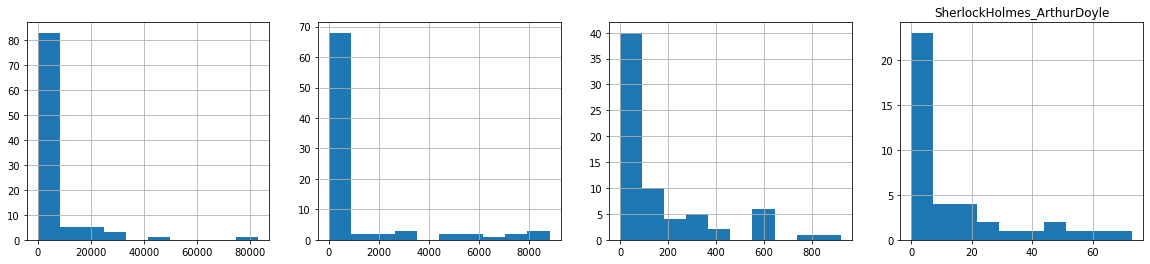

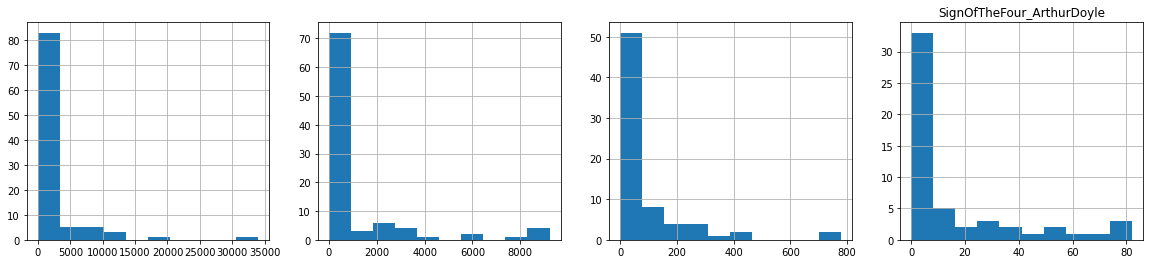

In [56]:
for file in all_files:
    
    dflux = charslen_df[file]
    dflux2 = charslen_df[file].loc[charslen_df[file] < 10000]
    dflux3 = charslen_df[file].loc[charslen_df[file] < 1000]
    dflux4 = charslen_df[file].loc[charslen_df[file] < 100]


    fig, axes = plt.subplots(1, 4)
    plt.rcParams["figure.figsize"] = (20,4)
    plt.title(f'{file[:-4]}')

    dflux.hist(bins=10, ax=axes[0])
    dflux2.hist(bins=10, ax=axes[1])
    dflux3.hist(bins=10, ax=axes[2])
    dflux4.hist(bins=10, ax=axes[3])
    
    plt.savefig(f'char_hist_{file[:-4]}.jpeg', bbox_inches='tight')
    

Continue

In [16]:
final_novels=[]

for nov in novels_train:
    
    nov = nov.split('.')
    
    final_novels.append(nov)

In [17]:
probs_log

{'GreatExpectations_CharlesDickens.txt': {' ': -1.9060899513101934,
  '!': -7.096445402226967,
  '$': 0,
  '&': -13.804529486080037,
  "'": 0,
  '(': -8.447943211408024,
  ')': -8.447943211408024,
  '*': 0,
  ',': -4.285381760037125,
  '-': -6.871106460349322,
  '.': -4.964094046813468,
  '/': 0,
  '0': 0,
  '1': 0,
  '2': -13.111382305520092,
  '3': 0,
  '4': -13.804529486080037,
  '5': 0,
  '6': 0,
  '7': 0,
  '8': 0,
  '9': 0,
  ':': -9.373712687236724,
  ';': -6.886823876244732,
  '?': -6.877952452857312,
  'A': -6.972575920514182,
  'B': -7.19652886078395,
  'C': -7.7547960308480794,
  'D': -8.074429703106462,
  'E': -7.8991676380254665,
  'F': -8.787249649265112,
  'G': -8.392883434224997,
  'H': -6.702030130305388,
  'I': -5.114055482521994,
  'J': -6.98124336372435,
  'K': -10.585653661211836,
  'L': -8.187758388413465,
  'M': -6.527973083361327,
  'N': -7.781081893119004,
  'O': -7.935232572946263,
  'P': -7.138845768297628,
  'Q': -11.2395801286185,
  'R': -9.04235555128228,


In [18]:
# Bayes Formula

probs_log_df = pd.DataFrame(probs_log)

In [19]:
probs_log_df.head()

,GreatExpectations_CharlesDickens.txt,GreatGatsby_FScottFitzgerald.txt,HuckleberryFinn_MarkTwain.txt,MobyDick_HermanMelville.txt,OliverTwist_CharlesDickens.txt,PridePrejudice_JaneAusten.txt,SherlockHolmes_ArthurDoyle.txt,SignOfTheFour_ArthurDoyle.txt
,-1.906090,-1.941014,-1.848190,-1.962518,-1.952570,-1.949593,-1.903485,-1.913451
!,-7.096445,-7.797881,-7.221429,-7.007369,-6.566327,-7.553931,-7.661139,-7.544575
$,0.000000,0.000000,-13.235144,-13.295228,0.000000,0.000000,0.000000,0.000000
&,-13.804529,0.000000,-13.235144,-13.295228,0.000000,-13.431667,-11.441533,0.000000
',0.000000,0.000000,-4.911778,0.000000,0.000000,0.000000,0.000000,0.000000


In [20]:
def second_largest(series):
    
    series = series[series!=0.0]
    
    return pd.Series(index=['max'],data=[series.max()])

In [21]:
max_df = probs_log_df.apply(second_largest)

In [22]:
max_df

,GreatExpectations_CharlesDickens.txt,GreatGatsby_FScottFitzgerald.txt,HuckleberryFinn_MarkTwain.txt,MobyDick_HermanMelville.txt,OliverTwist_CharlesDickens.txt,PridePrejudice_JaneAusten.txt,SherlockHolmes_ArthurDoyle.txt,SignOfTheFour_ArthurDoyle.txt
max,-1.90609,-1.941014,-1.84819,-1.962518,-1.95257,-1.949593,-1.903485,-1.913451


In [23]:
probs_given_novel = pd.DataFrame(columns = all_files)

for file in all_files:
    
    probs_given_novel[file] = probs_log_df[file].sum()


In [24]:
custom_MarkovChain = np.empty(len(all_files))
for i, file in enumerate(all_files):
    custom_MarkovChain[i] = probs_log_df[file].sum()
    
#With reducing the maximum of the entire model, we are regularizing the entire model.
custom_MarkovChain = custom_MarkovChain - custom_MarkovChain.max()

MarkovChain_Train = pd.DataFrame(data=custom_MarkovChain).T
MarkovChain_Train.columns=all_files


In [55]:
MarkovChain_Train.T

,0
GreatExpectations_CharlesDickens.txt,-72.345881
GreatGatsby_FScottFitzgerald.txt,-82.959803
HuckleberryFinn_MarkTwain.txt,-69.434474
MobyDick_HermanMelville.txt,-221.442762
OliverTwist_CharlesDickens.txt,0.000000
PridePrejudice_JaneAusten.txt,-132.079896
SherlockHolmes_ArthurDoyle.txt,-184.082489
SignOfTheFour_ArthurDoyle.txt,-126.279285


In [26]:
np.exp(custom_MarkovChain) / sum(np.exp(custom_MarkovChain))

array([3.80700202e-32, 9.35438710e-37, 6.99827789e-31, 6.73954074e-97,
       1.00000000e+00, 4.34940795e-58, 1.13237695e-80, 1.43748559e-55])

Transition Matrix

In [27]:
for file in all_files:
            
    book = open(PATH + file, 'r', encoding = 'utf-8-sig')
            
    novel = book.read()
    
    novel = data_cleaning(novel)
    
    novel_train, novel_test = data_split_custom(novel)
    
    ## Defining individual transition matrices
    
    counts = np.zeros((len(all_characters), len(all_characters)))
    
    pairs = zip(novel_train[:-1], novel_train[1:])
    
    #test_pairs = set{zip(novel_test[:-1], novel_train[1:])}
    
    for first, second in pairs:
        i = idx[first]
        j = idx[second]
        counts[i,j] += 1
    
    # Laplacian Smoothing
    counts += 1 
    
    #Defining a new DataFrame for each novel. 
    # As an example:
    # GreatExpectations_CharlesDickens is the count of co-occurences of all characters
    # probs_GreatExpectations_CharlesDickens are the individual probabilities. 
    
    globals()[f"{file[:-4]}"] = counts
    
    mid_sum = np.sum(counts, axis=1)
    
    globals()[f"probs_{file[:-4]}"] = pd.DataFrame(counts/(mid_sum.reshape(len(mid_sum),1)), index = idx, columns = idx)
    globals()[f"logs_{file[:-4]}"] = pd.DataFrame(np.log(counts/(mid_sum.reshape(len(mid_sum),1))), index = idx, columns = idx)
    
    

Name of our Transition Matrices

probs_GreatExpectations_CharlesDickens 

probs_GreatGatsby_FScottFitzgerald

probs_HuckleberryFinn_MarkTwain

probs_MobyDick_HermanMelville

probs_OliverTwist_CharlesDickens

probs_PridePrejudice_JaneAusten

probs_SherlockHolmes_ArthurDoyle

probs_SignOfTheFour_ArthurDoyle

Name of our Log Transition Matrices

logs_GreatExpectations_CharlesDickens 

logs_GreatGatsby_FScottFitzgerald

logs_HuckleberryFinn_MarkTwain

logs_MobyDick_HermanMelville

logs_OliverTwist_CharlesDickens

logs_PridePrejudice_JaneAusten

logs_SherlockHolmes_ArthurDoyle

logs_SignOfTheFour_ArthurDoyle

In [28]:
logs_GreatExpectations_CharlesDickens.head()

,,!,$,&,',(,),*,",",-,...,ô,ö,û,ü,œ,—,‘,’,“,”
,-11.205952,-9.596514,-11.899099,-11.205952,-11.899099,-6.547241,-11.899099,-11.899099,-9.065886,-11.205952,...,-11.899099,-11.899099,-11.899099,-11.899099,-11.899099,-10.800487,-7.664993,-7.568366,-3.825696,-11.899099
!,-1.137528,-5.434813,-6.821107,-6.821107,-6.821107,-6.821107,-5.211670,-6.821107,-6.821107,-6.821107,...,-6.821107,-6.821107,-6.821107,-6.821107,-6.821107,-4.048519,-6.821107,-4.113057,-6.821107,-0.624663
$,-4.584967,-4.584967,-4.584967,-4.584967,-4.584967,-4.584967,-4.584967,-4.584967,-4.584967,-4.584967,...,-4.584967,-4.584967,-4.584967,-4.584967,-4.584967,-4.584967,-4.584967,-4.584967,-4.584967,-4.584967
&,-3.901973,-4.595120,-4.595120,-4.595120,-4.595120,-4.595120,-4.595120,-4.595120,-4.595120,-4.595120,...,-4.595120,-4.595120,-4.595120,-4.595120,-4.595120,-4.595120,-4.595120,-4.595120,-4.595120,-4.595120
',-4.584967,-4.584967,-4.584967,-4.584967,-4.584967,-4.584967,-4.584967,-4.584967,-4.584967,-4.584967,...,-4.584967,-4.584967,-4.584967,-4.584967,-4.584967,-4.584967,-4.584967,-4.584967,-4.584967,-4.584967


Testing

We shall be testing over the novel Great Expectations test set and figure out how close it is to the DataFrame above.

In [29]:
test_pairs = set(zip(greatexp_test[:-1], greatexp_test[1:]))

book = open(PATH + 'GreatExpectations_CharlesDickens.txt', 'r', encoding = 'utf-8-sig')
            
novel = book.read()
    
novel = data_cleaning(novel)
    
_, greatexp_test = data_split_custom(novel)
    

In [31]:
test_pairs

{(' ', '('),
 (' ', ','),
 (' ', '.'),
 (' ', '1'),
 (' ', '2'),
 (' ', 'A'),
 (' ', 'B'),
 (' ', 'C'),
 (' ', 'D'),
 (' ', 'E'),
 (' ', 'F'),
 (' ', 'G'),
 (' ', 'H'),
 (' ', 'I'),
 (' ', 'J'),
 (' ', 'K'),
 (' ', 'L'),
 (' ', 'M'),
 (' ', 'N'),
 (' ', 'O'),
 (' ', 'P'),
 (' ', 'R'),
 (' ', 'S'),
 (' ', 'T'),
 (' ', 'U'),
 (' ', 'V'),
 (' ', 'W'),
 (' ', 'X'),
 (' ', 'Y'),
 (' ', '['),
 (' ', 'a'),
 (' ', 'b'),
 (' ', 'c'),
 (' ', 'd'),
 (' ', 'e'),
 (' ', 'f'),
 (' ', 'g'),
 (' ', 'h'),
 (' ', 'i'),
 (' ', 'j'),
 (' ', 'k'),
 (' ', 'l'),
 (' ', 'm'),
 (' ', 'n'),
 (' ', 'o'),
 (' ', 'p'),
 (' ', 'q'),
 (' ', 'r'),
 (' ', 's'),
 (' ', 't'),
 (' ', 'u'),
 (' ', 'v'),
 (' ', 'w'),
 (' ', 'y'),
 (' ', '‘'),
 (' ', '’'),
 (' ', '“'),
 ('!', ' '),
 ('!', ')'),
 ('!', '—'),
 ('!', '’'),
 ('!', '”'),
 ('(', 'I'),
 ('(', 'M'),
 ('(', 'S'),
 ('(', 'a'),
 ('(', 'b'),
 ('(', 'd'),
 ('(', 'f'),
 ('(', 'i'),
 ('(', 'm'),
 ('(', 'n'),
 ('(', 'o'),
 ('(', 'p'),
 ('(', 's'),
 ('(', 't'),
 ('(', 'w'),

In [32]:
#These variables are listed as abbreviations of the novel and the author name combined.
    
GECD_test = 0
GGFSF_test = 0
HFMT_test = 0
MDHM_test = 0
OTCD_test = 0
PPJA_test = 0
SAAD_test = 0
STFAD_test = 0

test_df = MarkovChain_Train.copy()

In [33]:
for first, second in test_pairs:
    
    
    GECD_test += logs_GreatExpectations_CharlesDickens.loc[first, second]
    GGFSF_test += logs_GreatGatsby_FScottFitzgerald.loc[first, second]
    HFMT_test += logs_HuckleberryFinn_MarkTwain.loc[first, second]
    MDHM_test += logs_MobyDick_HermanMelville.loc[first, second]
    OTCD_test += logs_OliverTwist_CharlesDickens.loc[first, second]
    PPJA_test += logs_PridePrejudice_JaneAusten.loc[first, second]
    SAAD_test += logs_SherlockHolmes_ArthurDoyle.loc[first, second]
    STFAD_test += logs_SignOfTheFour_ArthurDoyle.loc[first, second]

In [34]:
test_df['GreatExpectations_CharlesDickens.txt'] = GECD_test
test_df['GreatGatsby_FScottFitzgerald.txt'] = GGFSF_test
test_df['HuckleberryFinn_MarkTwain.txt'] = HFMT_test
test_df['MobyDick_HermanMelville.txt'] = MDHM_test
test_df['OliverTwist_CharlesDickens.txt'] = OTCD_test
test_df['PridePrejudice_JaneAusten.txt'] = PPJA_test
test_df['SherlockHolmes_ArthurDoyle.txt'] = SAAD_test
test_df['SignOfTheFour_ArthurDoyle.txt'] = STFAD_test

In [35]:
max_test_coef = max(GECD_test, GGFSF_test, HFMT_test, MDHM_test, OTCD_test, PPJA_test, SAAD_test, STFAD_test)

In [36]:
max_test_coef

-4409.3231473310425

In [37]:
test_df = test_df - max_test_coef

In [38]:
test_df.T

,0
GreatExpectations_CharlesDickens.txt,-43.320239
GreatGatsby_FScottFitzgerald.txt,-164.480681
HuckleberryFinn_MarkTwain.txt,-348.941628
MobyDick_HermanMelville.txt,0.000000
OliverTwist_CharlesDickens.txt,-121.784514
PridePrejudice_JaneAusten.txt,-368.599619
SherlockHolmes_ArthurDoyle.txt,-201.062867
SignOfTheFour_ArthurDoyle.txt,-176.819138


In [39]:
book = open(PATH + 'MobyDick_HermanMelville.txt', 'r', encoding = 'utf-8-sig')
            
novel = book.read()
    
novel = data_cleaning(novel)
    
_, mobydick_test = data_split_custom(novel)
    

In [40]:
test_pairs = set(zip(mobydick_test[:-1], mobydick_test[1:]))

In [41]:
GECD_test = 0
GGFSF_test = 0
HFMT_test = 0
MDHM_test = 0
OTCD_test = 0
PPJA_test = 0
SAAD_test = 0
STFAD_test = 0

test_df2 = MarkovChain_Train.copy()

In [42]:
for first, second in test_pairs:
    
    
    GECD_test += logs_GreatExpectations_CharlesDickens.loc[first, second]
    GGFSF_test += logs_GreatGatsby_FScottFitzgerald.loc[first, second]
    HFMT_test += logs_HuckleberryFinn_MarkTwain.loc[first, second]
    MDHM_test += logs_MobyDick_HermanMelville.loc[first, second]
    OTCD_test += logs_OliverTwist_CharlesDickens.loc[first, second]
    PPJA_test += logs_PridePrejudice_JaneAusten.loc[first, second]
    SAAD_test += logs_SherlockHolmes_ArthurDoyle.loc[first, second]
    STFAD_test += logs_SignOfTheFour_ArthurDoyle.loc[first, second]

In [43]:
test_df2['GreatExpectations_CharlesDickens.txt'] = GECD_test
test_df2['GreatGatsby_FScottFitzgerald.txt'] = GGFSF_test
test_df2['HuckleberryFinn_MarkTwain.txt'] = HFMT_test
test_df2['MobyDick_HermanMelville.txt'] = MDHM_test
test_df2['OliverTwist_CharlesDickens.txt'] = OTCD_test
test_df2['PridePrejudice_JaneAusten.txt'] = PPJA_test
test_df2['SherlockHolmes_ArthurDoyle.txt'] = SAAD_test
test_df2['SignOfTheFour_ArthurDoyle.txt'] = STFAD_test

In [44]:
max_test_coef = max(GECD_test, GGFSF_test, HFMT_test, MDHM_test, OTCD_test, PPJA_test, SAAD_test, STFAD_test)

In [45]:
test_df2 = test_df2 - max_test_coef

In [59]:
test_df2.T

,0
GreatExpectations_CharlesDickens.txt,-324.104301
GreatGatsby_FScottFitzgerald.txt,-311.597488
HuckleberryFinn_MarkTwain.txt,-503.425249
MobyDick_HermanMelville.txt,0.000000
OliverTwist_CharlesDickens.txt,-314.991144
PridePrejudice_JaneAusten.txt,-557.856653
SherlockHolmes_ArthurDoyle.txt,-344.515839
SignOfTheFour_ArthurDoyle.txt,-316.507053


In [47]:
book = open(PATH + 'SherlockHolmes_ArthurDoyle.txt', 'r', encoding = 'utf-8-sig')
            
novel = book.read()
    
novel = data_cleaning(novel)
    
_, sherlockholmes_test = data_split_custom(novel)
    

In [48]:
test_pairs = set(zip(sherlockholmes_test[:-1], sherlockholmes_test[1:]))

In [49]:
GECD_test = 0
GGFSF_test = 0
HFMT_test = 0
MDHM_test = 0
OTCD_test = 0
PPJA_test = 0
SAAD_test = 0
STFAD_test = 0

test_df3 = MarkovChain_Train.copy()

In [50]:
for first, second in test_pairs:
    
    
    GECD_test += logs_GreatExpectations_CharlesDickens.loc[first, second]
    GGFSF_test += logs_GreatGatsby_FScottFitzgerald.loc[first, second]
    HFMT_test += logs_HuckleberryFinn_MarkTwain.loc[first, second]
    MDHM_test += logs_MobyDick_HermanMelville.loc[first, second]
    OTCD_test += logs_OliverTwist_CharlesDickens.loc[first, second]
    PPJA_test += logs_PridePrejudice_JaneAusten.loc[first, second]
    SAAD_test += logs_SherlockHolmes_ArthurDoyle.loc[first, second]
    STFAD_test += logs_SignOfTheFour_ArthurDoyle.loc[first, second]

In [51]:
test_df3['GreatExpectations_CharlesDickens.txt'] = GECD_test
test_df3['GreatGatsby_FScottFitzgerald.txt'] = GGFSF_test
test_df3['HuckleberryFinn_MarkTwain.txt'] = HFMT_test
test_df3['MobyDick_HermanMelville.txt'] = MDHM_test
test_df3['OliverTwist_CharlesDickens.txt'] = OTCD_test
test_df3['PridePrejudice_JaneAusten.txt'] = PPJA_test
test_df3['SherlockHolmes_ArthurDoyle.txt'] = SAAD_test
test_df3['SignOfTheFour_ArthurDoyle.txt'] = STFAD_test

In [52]:
max_test_coef = max(GECD_test, GGFSF_test, HFMT_test, MDHM_test, OTCD_test, PPJA_test, SAAD_test, STFAD_test)

In [53]:
test_df3 = test_df3 - max_test_coef

In [54]:
test_df3.T

,0
GreatExpectations_CharlesDickens.txt,-135.673609
GreatGatsby_FScottFitzgerald.txt,-172.671106
HuckleberryFinn_MarkTwain.txt,-333.149882
MobyDick_HermanMelville.txt,0.000000
OliverTwist_CharlesDickens.txt,-49.061198
PridePrejudice_JaneAusten.txt,-328.164736
SherlockHolmes_ArthurDoyle.txt,-59.171507
SignOfTheFour_ArthurDoyle.txt,-148.828645


Practice Area

Breaking point

This next cell would be used to generate a word cloud for each novel.

In [31]:
for file in all_files:
            
    book = open(PATH + file, 'r', encoding = 'utf-8-sig')
            
    novel = book.read()
    
    novel = re.sub('\n', ' ', novel)
    novel = re.sub('_', ' ', novel)
    novel = re.sub('\u200a', ' ', novel)
    novel = re.sub('½', '1/2', novel)
    novel = re.sub(' +', ' ', novel)
    novel = re.sub('\t', ' ', novel)
    novel = re.sub('…', ' ', novel)
    
    word_cloud = WordCloud(
        width=3000,
        height=2000,
        random_state=123,
        max_words=100,
        background_color="purple",
        colormap="Set2",
        collocations=False,
        stopwords=STOPWORDS
    ).generate(novel)
    
    word_cloud.to_file(f'{file[:-4]}.jpeg')